### Stat Distribution 
- Calculate statistical measures such as mean, mode, and range for exit velocity and launch angle
- Visualize the distributions of exit velocity and launch angle using histograms

Datasets: 
Only test on the 2024 MLB home runs dataset so far

In [1]:
import pandas as pd

# Attempted on 2024 dataset first only - update other years later
file_path = "2024-mlb-homeruns.csv"
df = pd.read_csv(file_path)

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5450 entries, 0 to 5449
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       5450 non-null   object 
 1   title         5450 non-null   object 
 2   ExitVelocity  5444 non-null   float64
 3   HitDistance   5450 non-null   float64
 4   LaunchAngle   5444 non-null   float64
 5   video         5450 non-null   object 
dtypes: float64(3), object(3)
memory usage: 255.6+ KB


(None,
                                 play_id  \
 0  148e943b-10db-4d71-943d-ead3b36bebbc   
 1  d4116f91-e362-4261-a7d0-fc02f0eeb67b   
 2  2d6363ad-8ff2-49cc-bf21-d8cdfdc55999   
 3  e97b2fb3-a7b9-4a4b-812a-f1204437a06f   
 4  3423ed8c-5945-46e0-89f4-d6ed2baf5696   
 
                                                title  ExitVelocity  \
 0  Freddie Freeman homers (1) on a fly ball to ce...         101.7   
 1  Mookie Betts homers (2) on a fly ball to left ...         104.6   
 2  George Springer homers (1) on a fly ball to le...         100.3   
 3  Paul Goldschmidt homers (1) on a fly ball to l...         101.8   
 4  Nick Martini homers (2) on a fly ball to right...         100.8   
 
    HitDistance  LaunchAngle                                              video  
 0   408.819710         33.0  https://sporty-clips.mlb.com/eVozQWVfWGw0TUFRP...  
 1   406.399234         28.0  https://sporty-clips.mlb.com/eVozQWVfWGw0TUFRP...  
 2   391.587326         26.0  https://sporty-clips.ml

In [2]:
import numpy as np

df_clean = df.dropna(subset=["ExitVelocity", "LaunchAngle"])

exit_velocity_mean = df_clean["ExitVelocity"].mean()
exit_velocity_mode = df_clean["ExitVelocity"].mode()[0]
exit_velocity_range = (df_clean["ExitVelocity"].min(), df_clean["ExitVelocity"].max())

launch_angle_mean = df_clean["LaunchAngle"].mean()
launch_angle_mode = df_clean["LaunchAngle"].mode()[0]
launch_angle_range = (df_clean["LaunchAngle"].min(), df_clean["LaunchAngle"].max())

exit_velocity_mean, exit_velocity_mode, exit_velocity_range, launch_angle_mean, launch_angle_mode, launch_angle_range


(104.31803820720057,
 102.7,
 (86.5, 119.9),
 28.70903747244673,
 28.0,
 (14.0, 50.0))

### Output Analysis Response

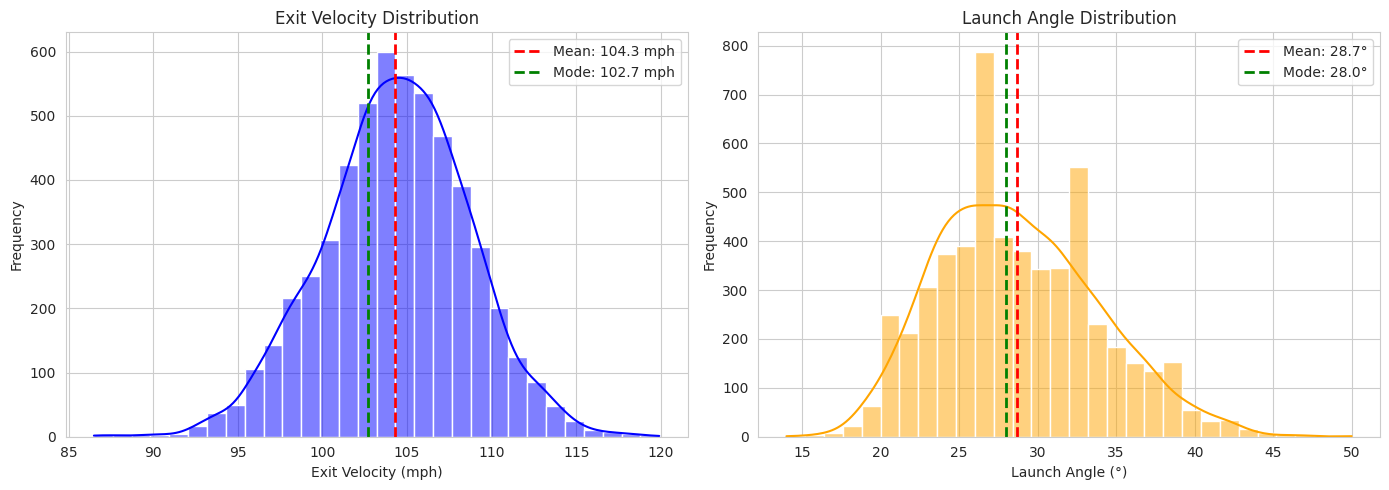

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Exit Velocity Distribution
sns.histplot(df_clean["ExitVelocity"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].axvline(exit_velocity_mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {exit_velocity_mean:.1f} mph")
axes[0].axvline(exit_velocity_mode, color="green", linestyle="dashed", linewidth=2, label=f"Mode: {exit_velocity_mode:.1f} mph")
axes[0].set_title("Exit Velocity Distribution")
axes[0].set_xlabel("Exit Velocity (mph)")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Launch Angle Distribution
sns.histplot(df_clean["LaunchAngle"], bins=30, kde=True, ax=axes[1], color="orange")
axes[1].axvline(launch_angle_mean, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {launch_angle_mean:.1f}°")
axes[1].axvline(launch_angle_mode, color="green", linestyle="dashed", linewidth=2, label=f"Mode: {launch_angle_mode:.1f}°")
axes[1].set_title("Launch Angle Distribution")
axes[1].set_xlabel("Launch Angle (°)")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()
